In [126]:
# imports
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer

import plotly.express as px

import json
import string
import os

In [127]:
# installs
# !pip install numpy matplotlib pandas missingno

# data preparation

In [128]:
datapath = './data'
fileName = 'agriRuralDevelopment.csv'

df_oig = pd.read_csv(os.path.join(datapath, fileName), index_col=False)

## removing aggregated values

In [129]:
shape_before = df_oig.shape
aggregated_list = ["Arab World" ,
        "Caribbean small states", 
        "Central Europe and the Baltics", 
        "East Asia & Pacific",
        "European Union",
        "Europe & Central Asia",
        "Latin America & Caribbean",
        "Middle East & North Africa",
        "North America",
        "Small states",
        "South Asia",
        "Sub-Saharan Africa",
        "World"
        ]

df = df_oig.loc[df_oig["Country Name"].apply(lambda x : x not in aggregated_list)].reset_index(drop = True)
df.head()
shape_after = df.shape

print(shape_before, shape_after, shape_before[0] - shape_after[0])

(13908, 55) (13115, 55) 793


<AxesSubplot: >

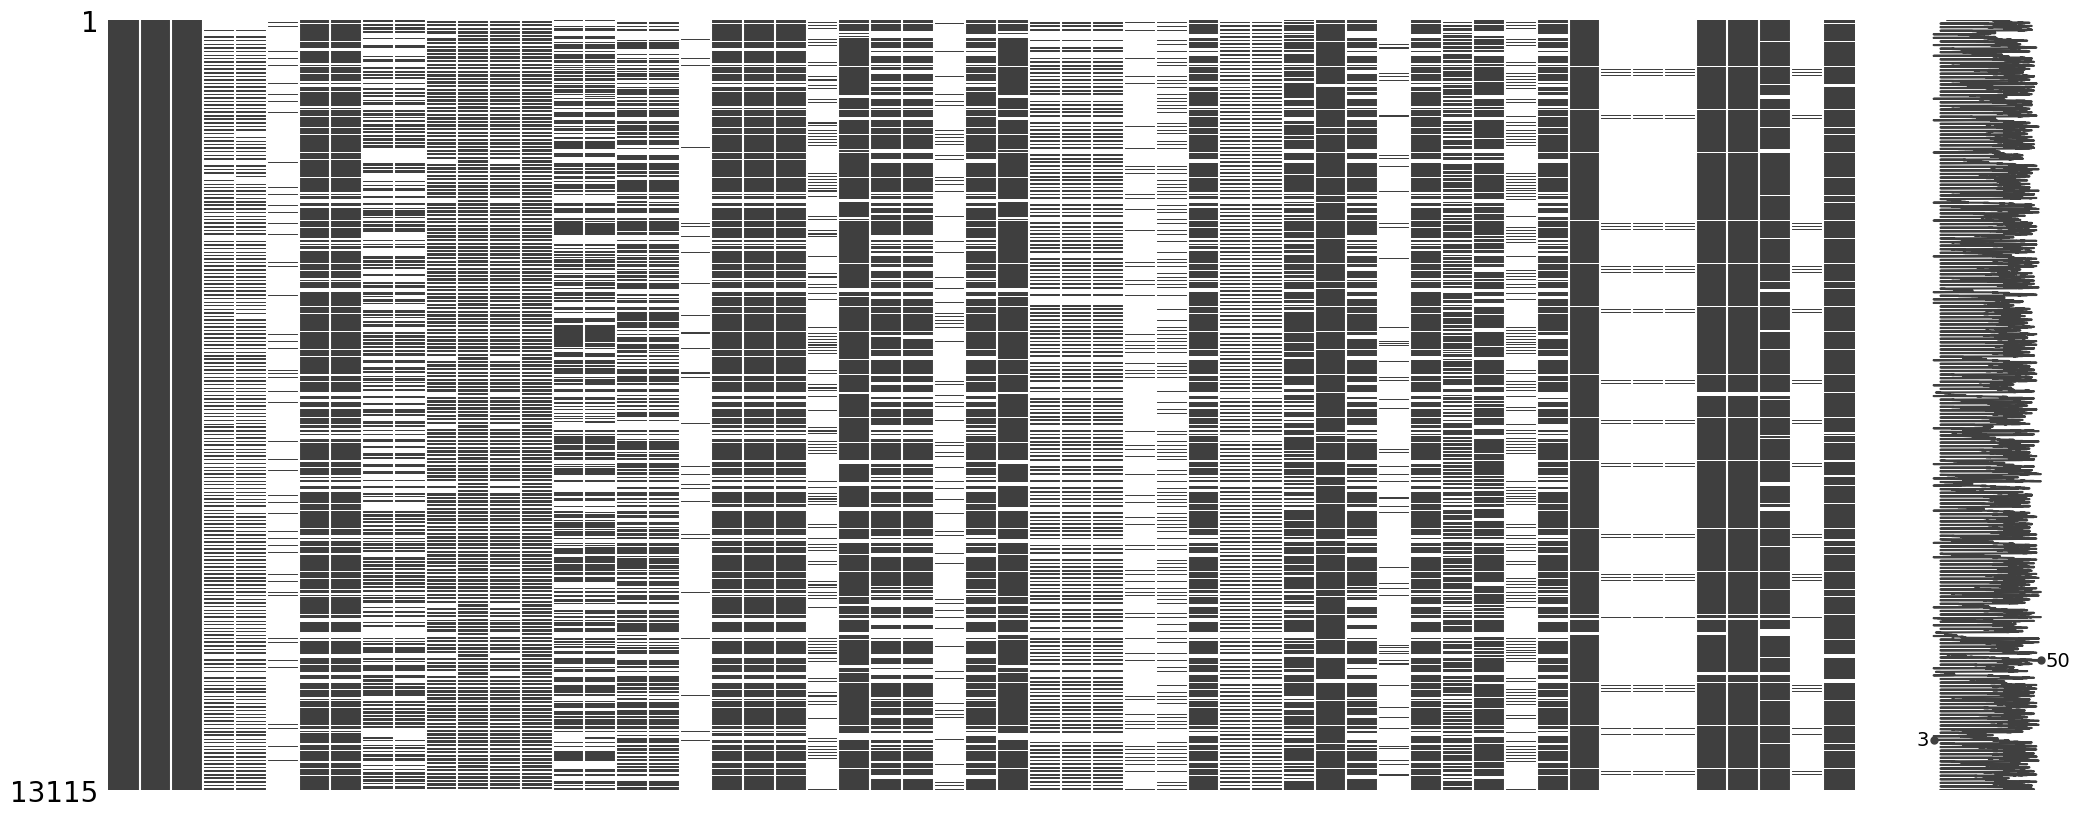

In [130]:
msno.matrix(df)

## selecting well represented columns

<AxesSubplot: >

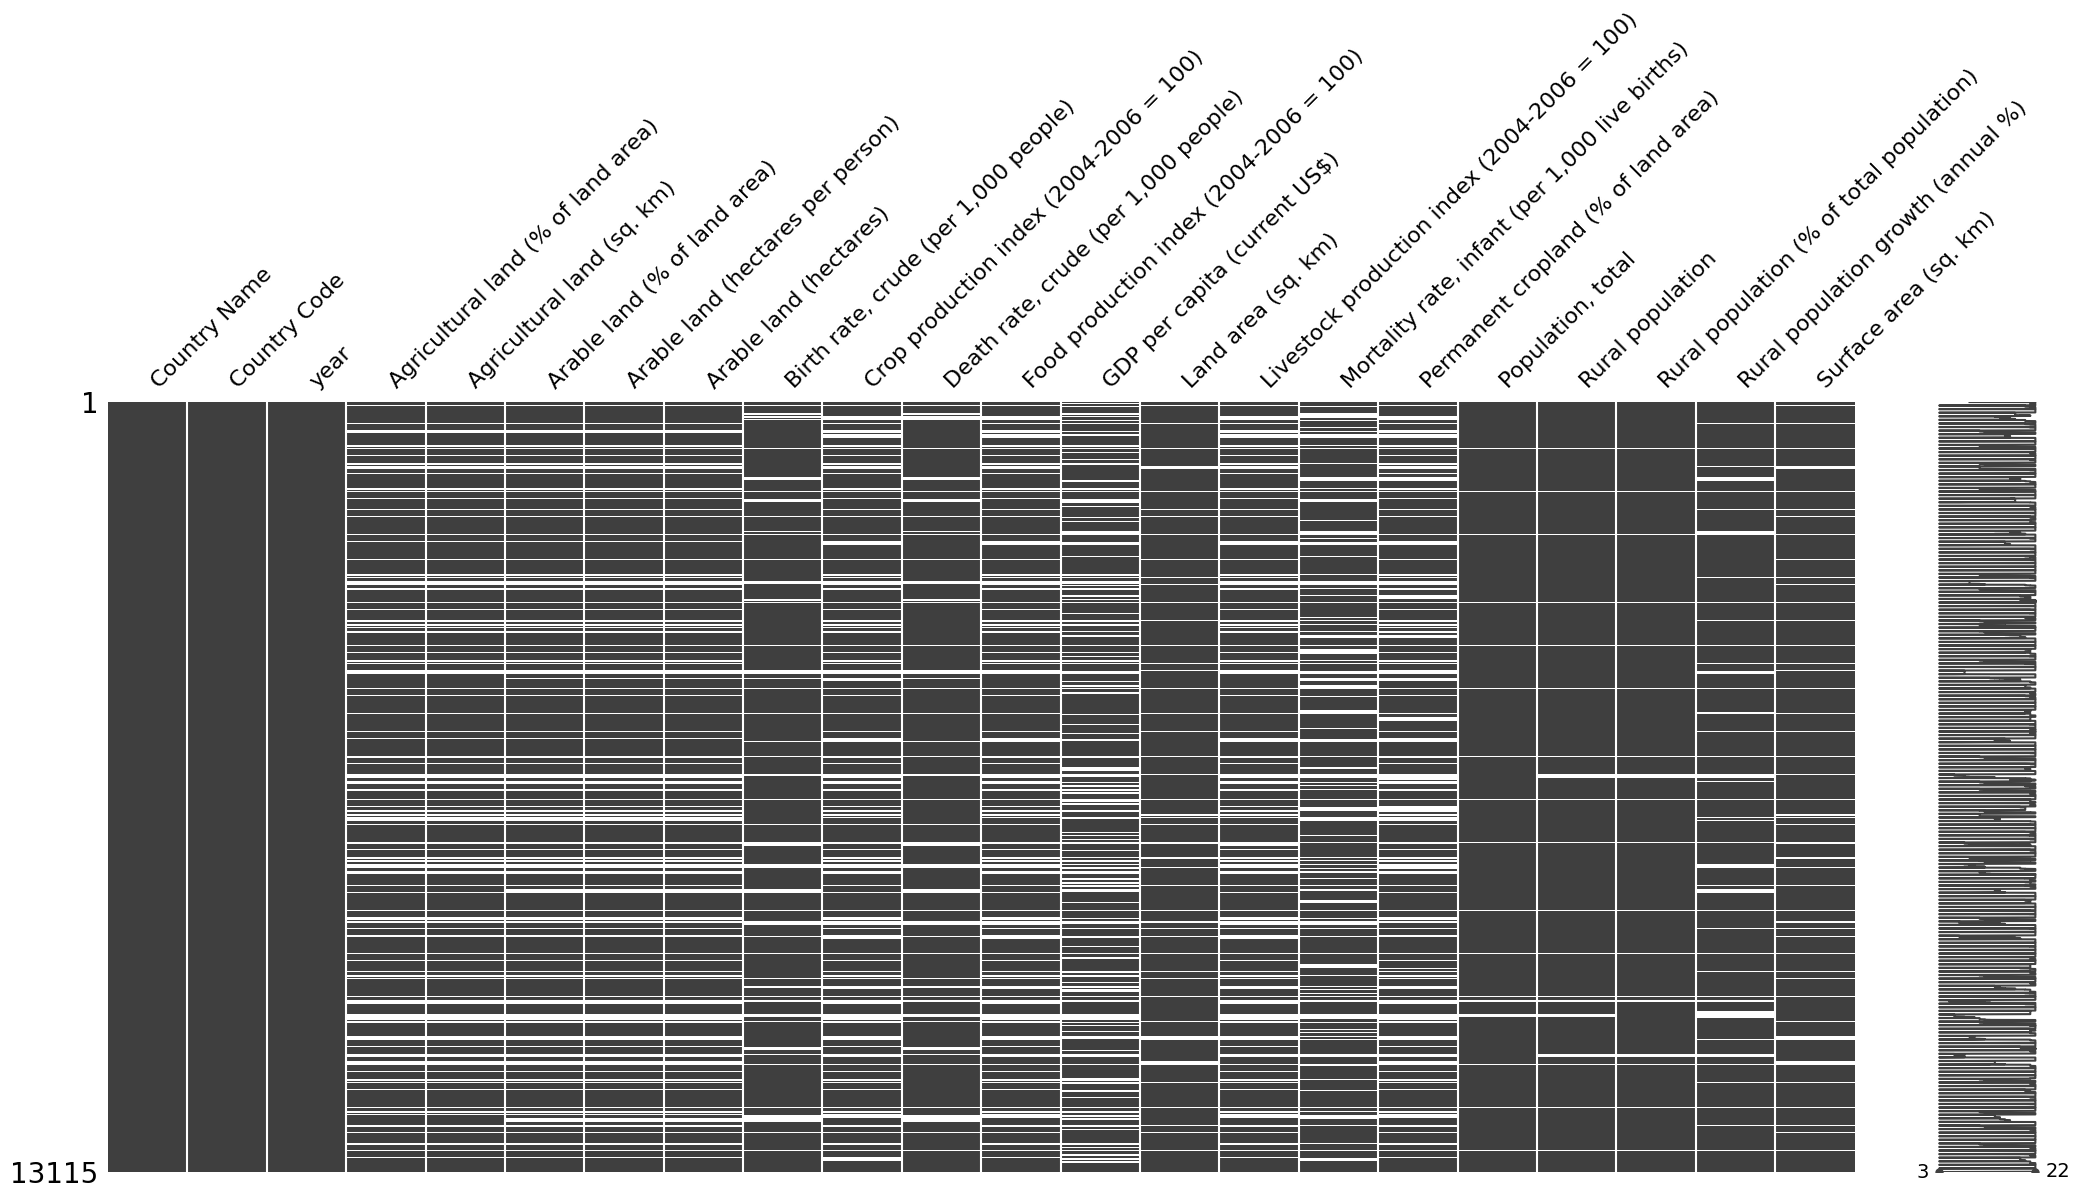

In [131]:
criteria = df[:].isna().sum() < 13115 * 0.3 # allowed nans
df_selected = df[criteria.index[criteria]]
msno.matrix(df_selected)

<AxesSubplot: >

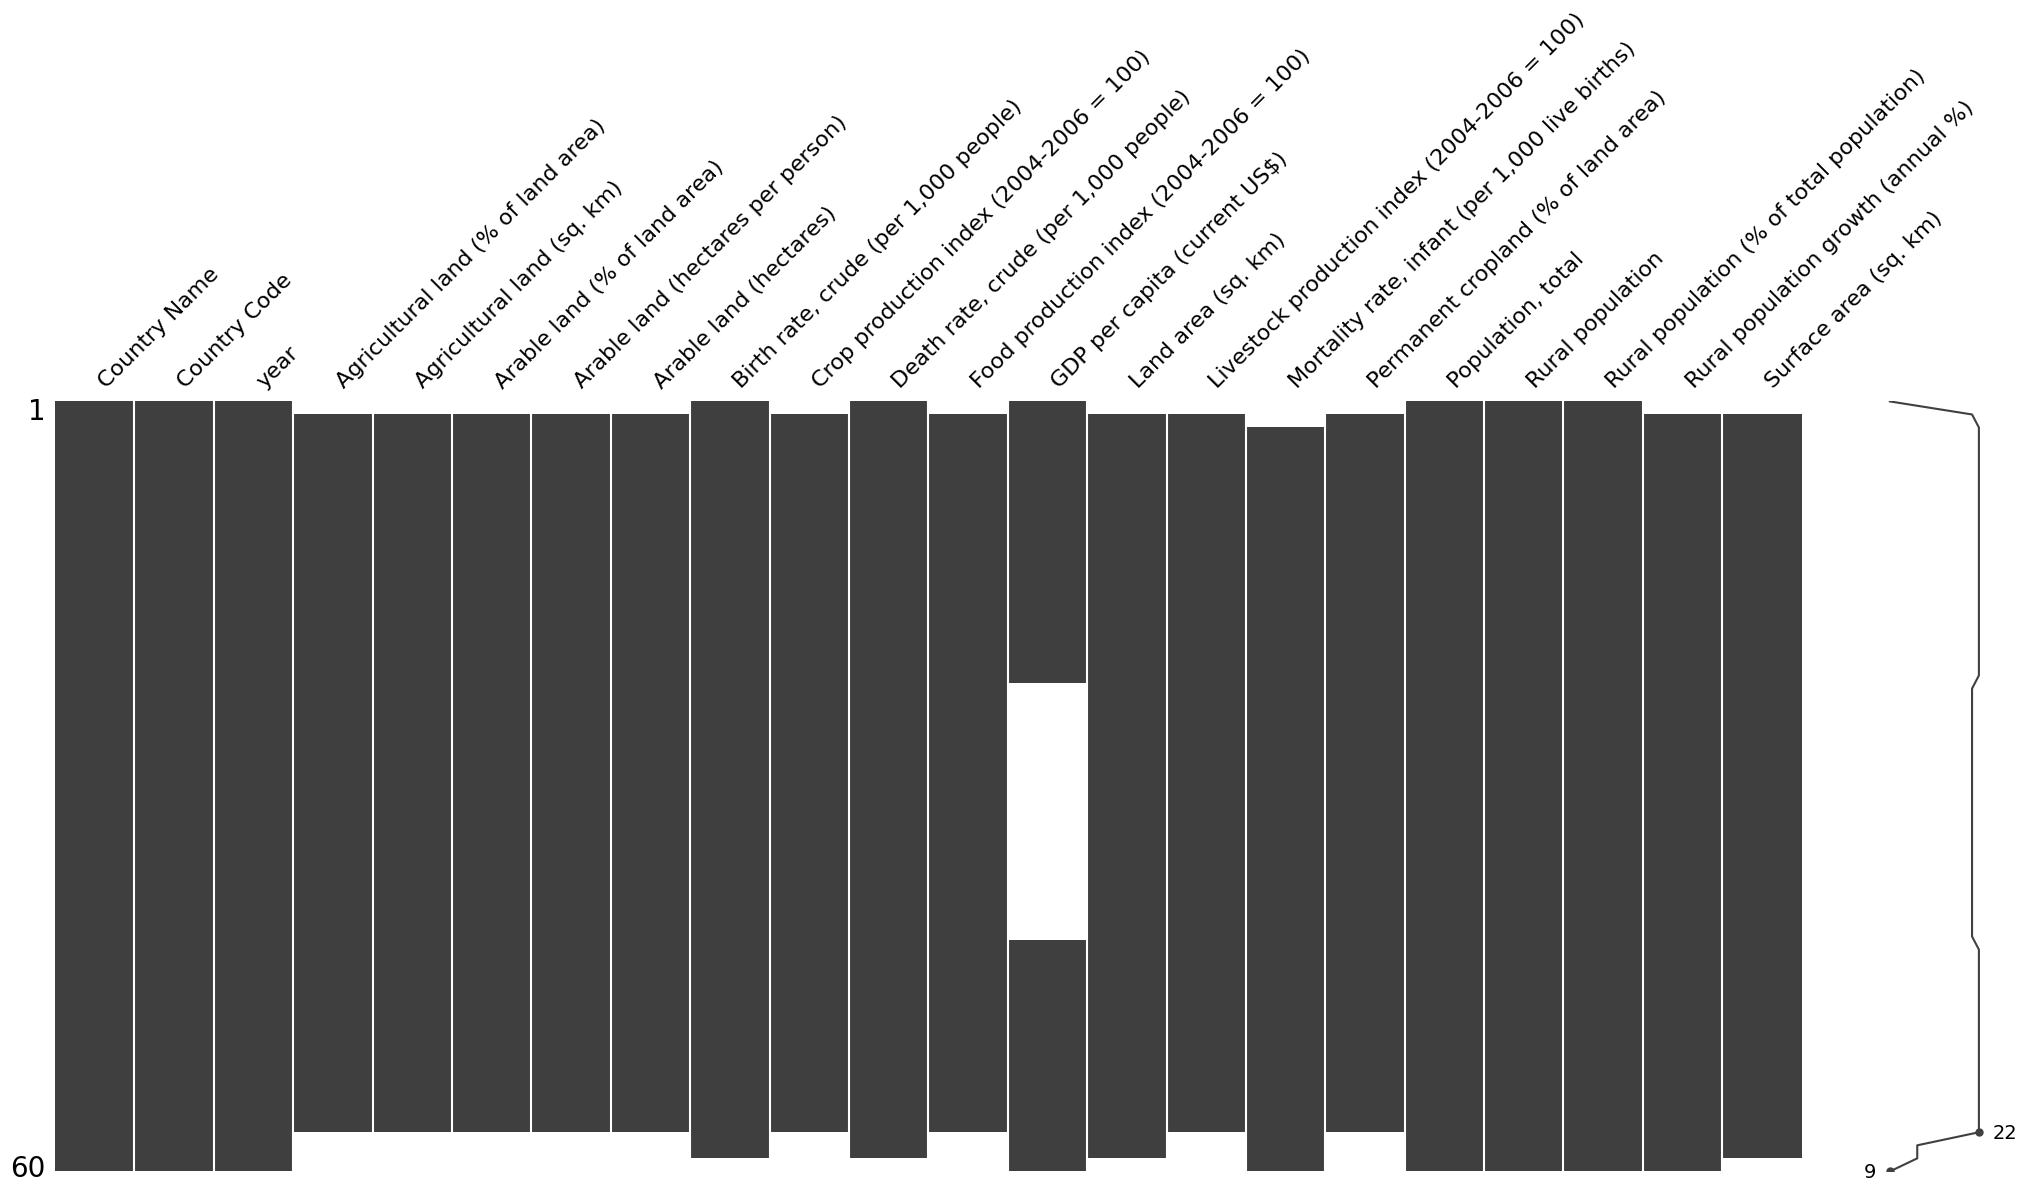

In [132]:
df_selected.iloc[0:60]["Country Name"]
sample_df = df_selected.iloc[0:60]
msno.matrix(sample_df)

In [133]:
def myImputationFunction(colm):
    sol = colm.interpolate(method='linear')
    sol = sol[::-1]
    sol = sol.interpolate(method='linear')
    sol = sol[::-1]
    colm = sol
    return colm

<AxesSubplot: >

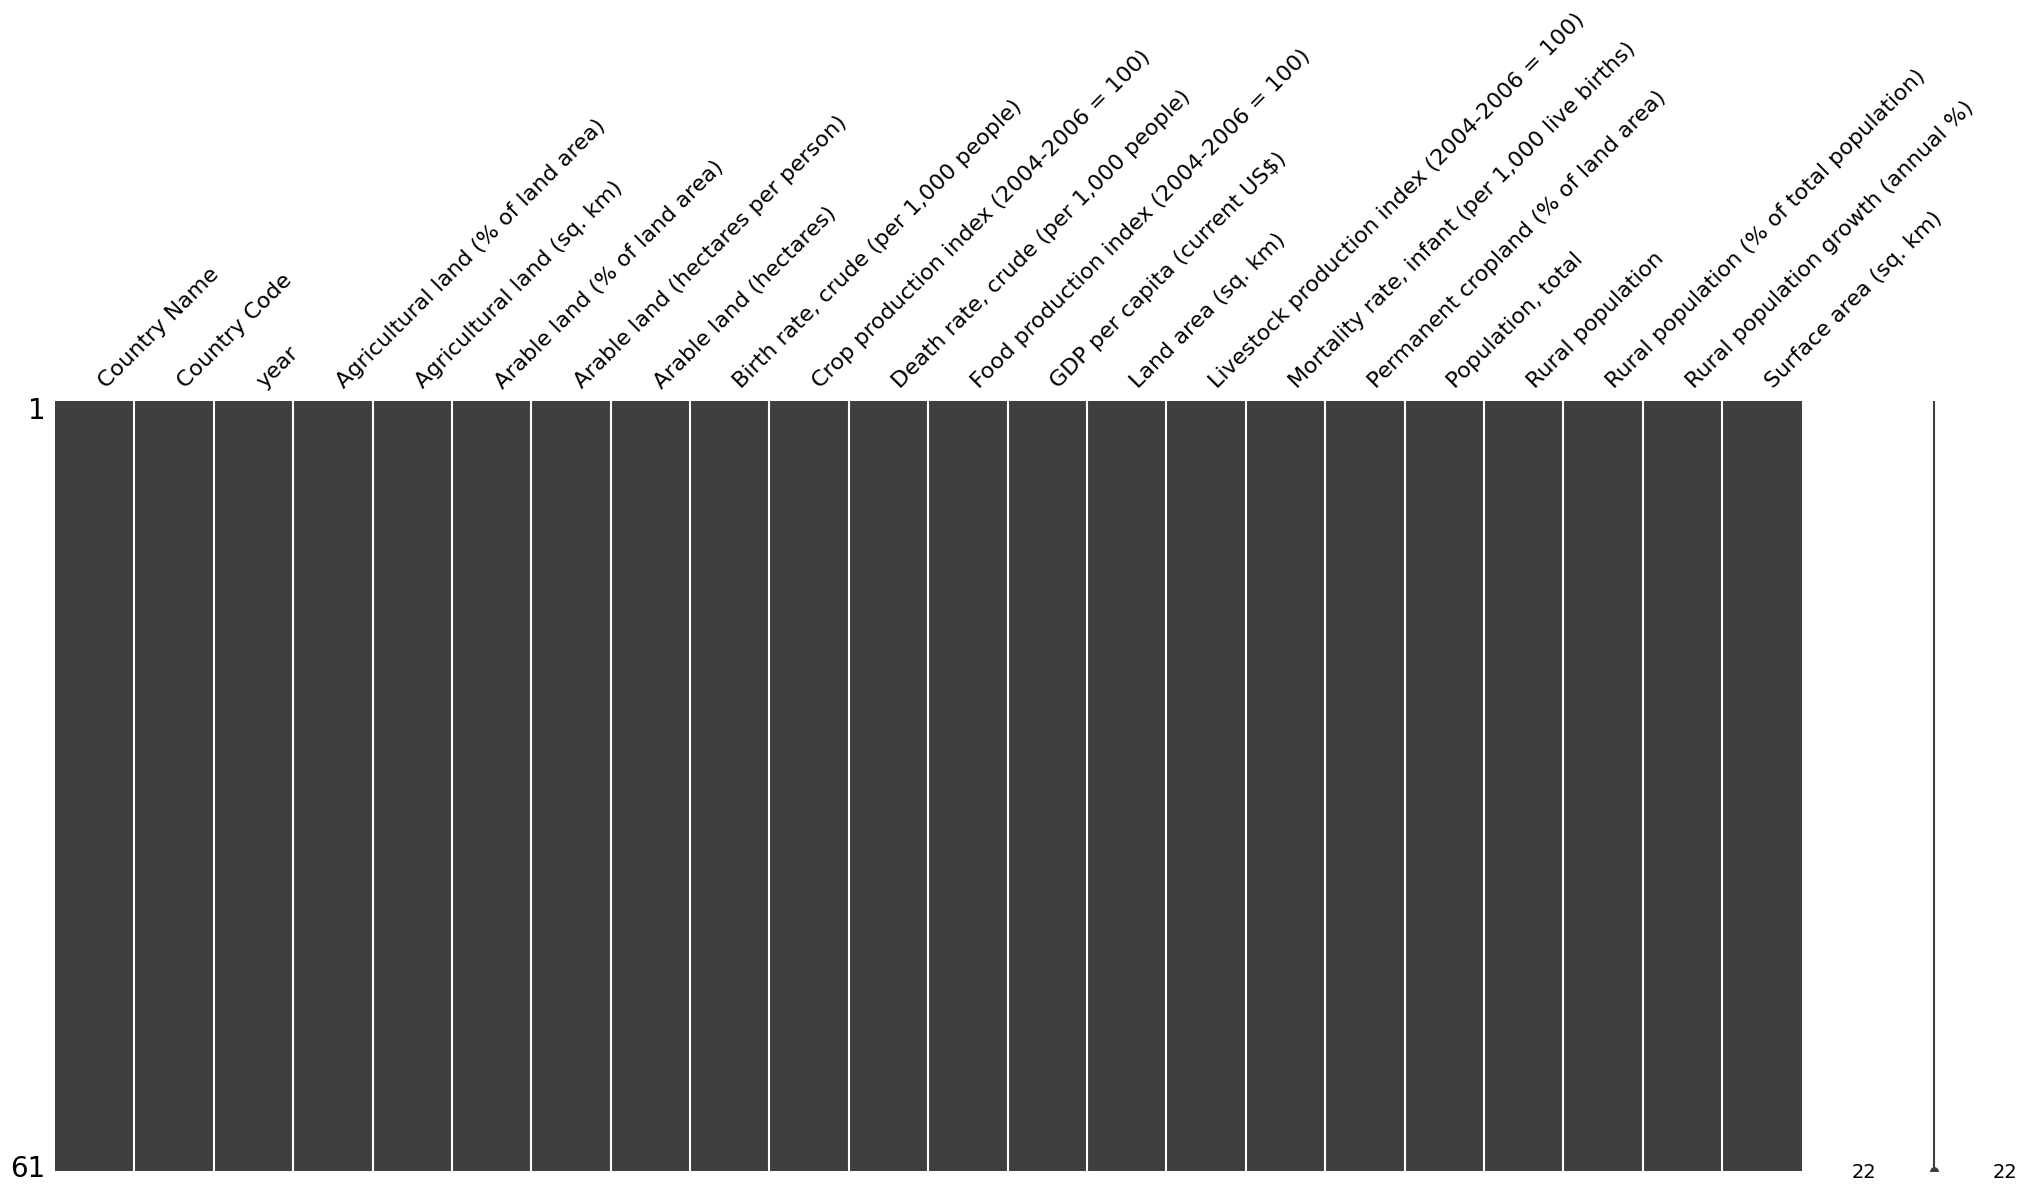

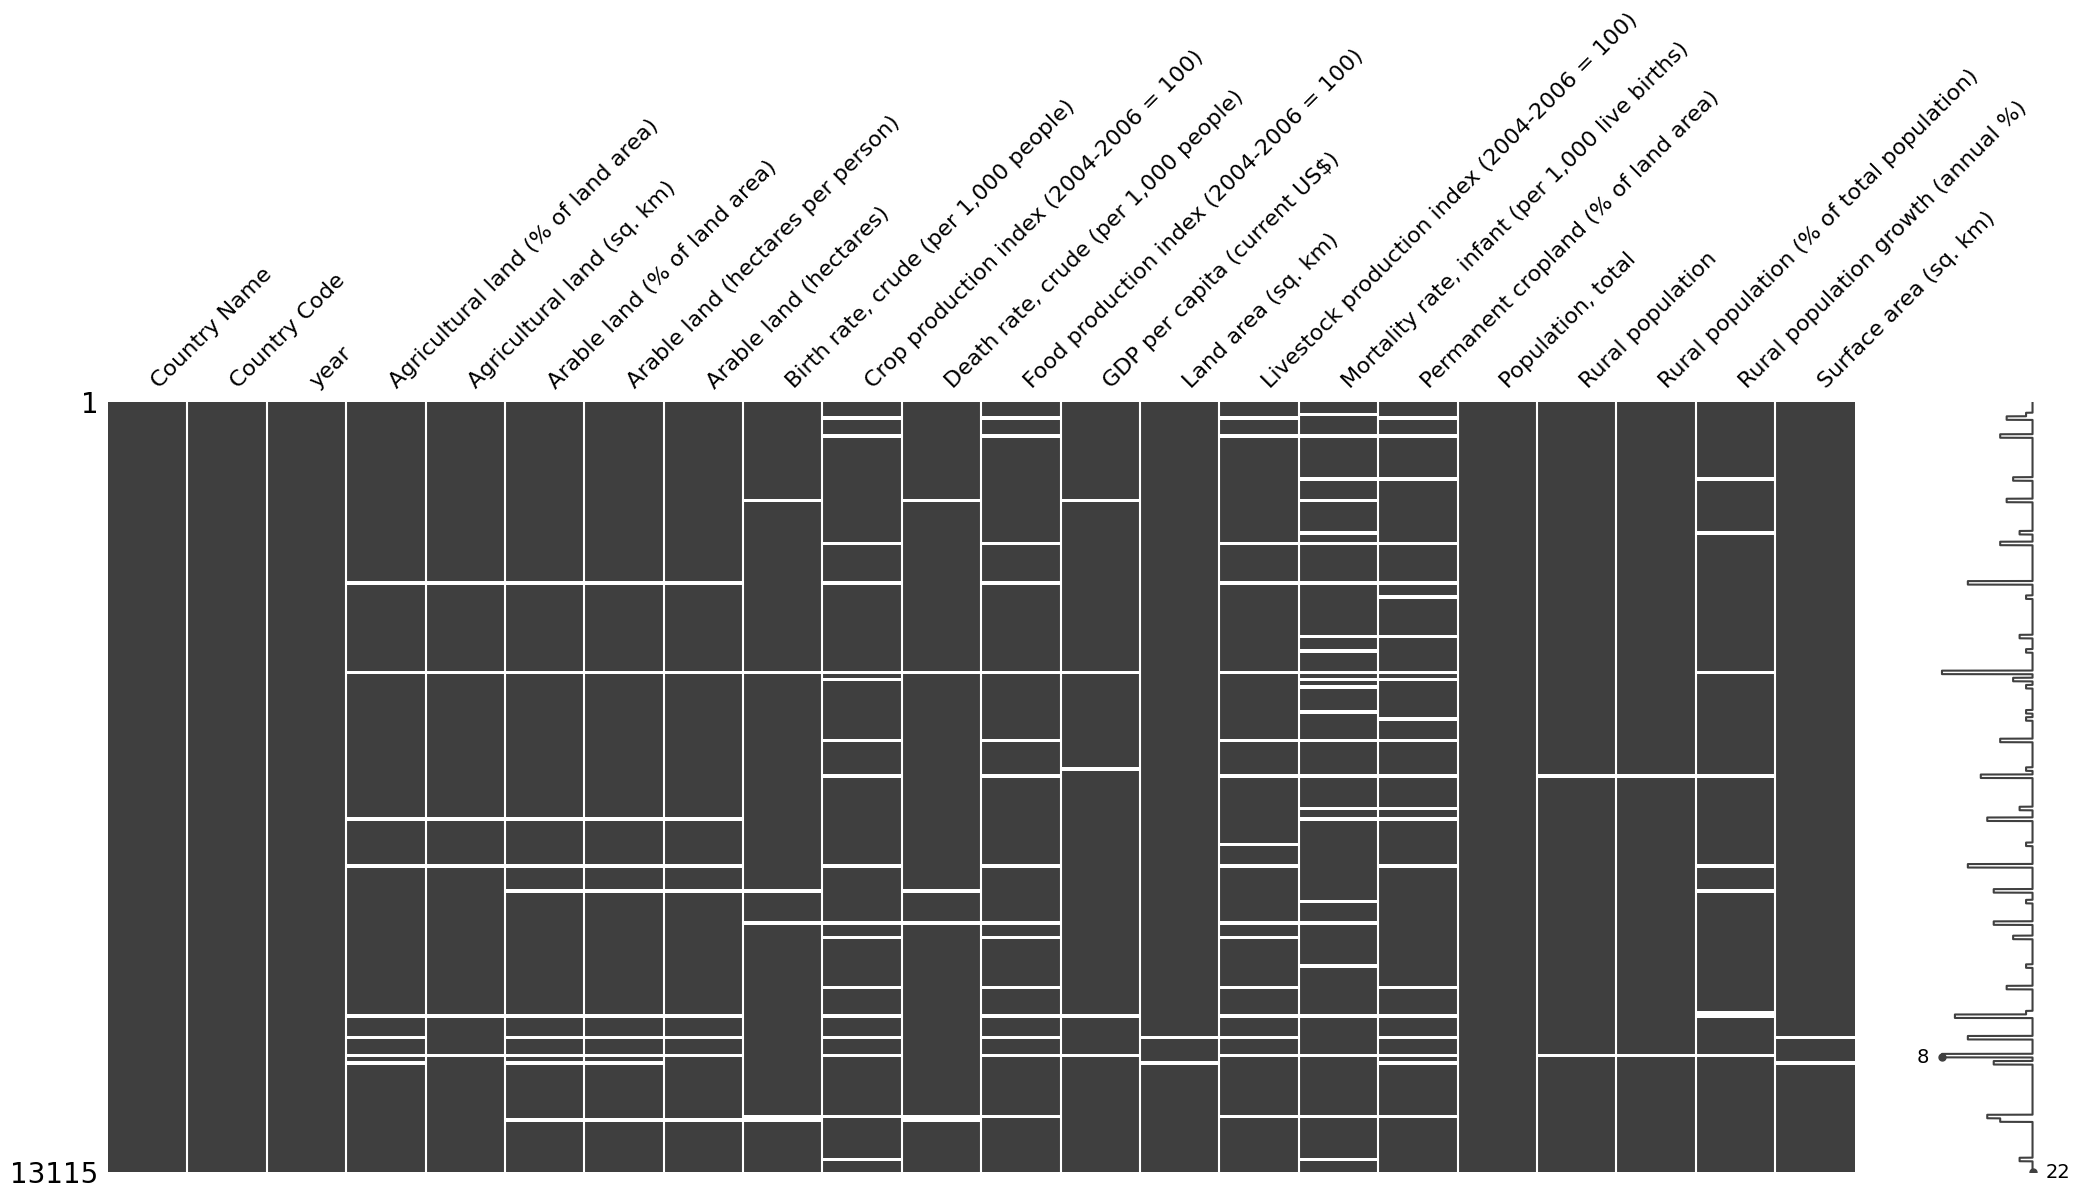

In [134]:

df_imputed = df_selected.copy()

country_names = sorted(list(set(df_imputed["Country Name"])))
for cn in country_names:
    selected = df_imputed.loc[df_imputed["Country Name"] == cn,:]
    solution = df_imputed.loc[df_imputed["Country Name"] == cn,:].apply(lambda x: myImputationFunction(x), axis=0)
    df_imputed.loc[df_imputed["Country Name"] == cn,:] = solution

msno.matrix(df_imputed.loc[df_imputed["Country Name"] == country_names[0],:])
msno.matrix(df_imputed)

# Data Imputation Visualization

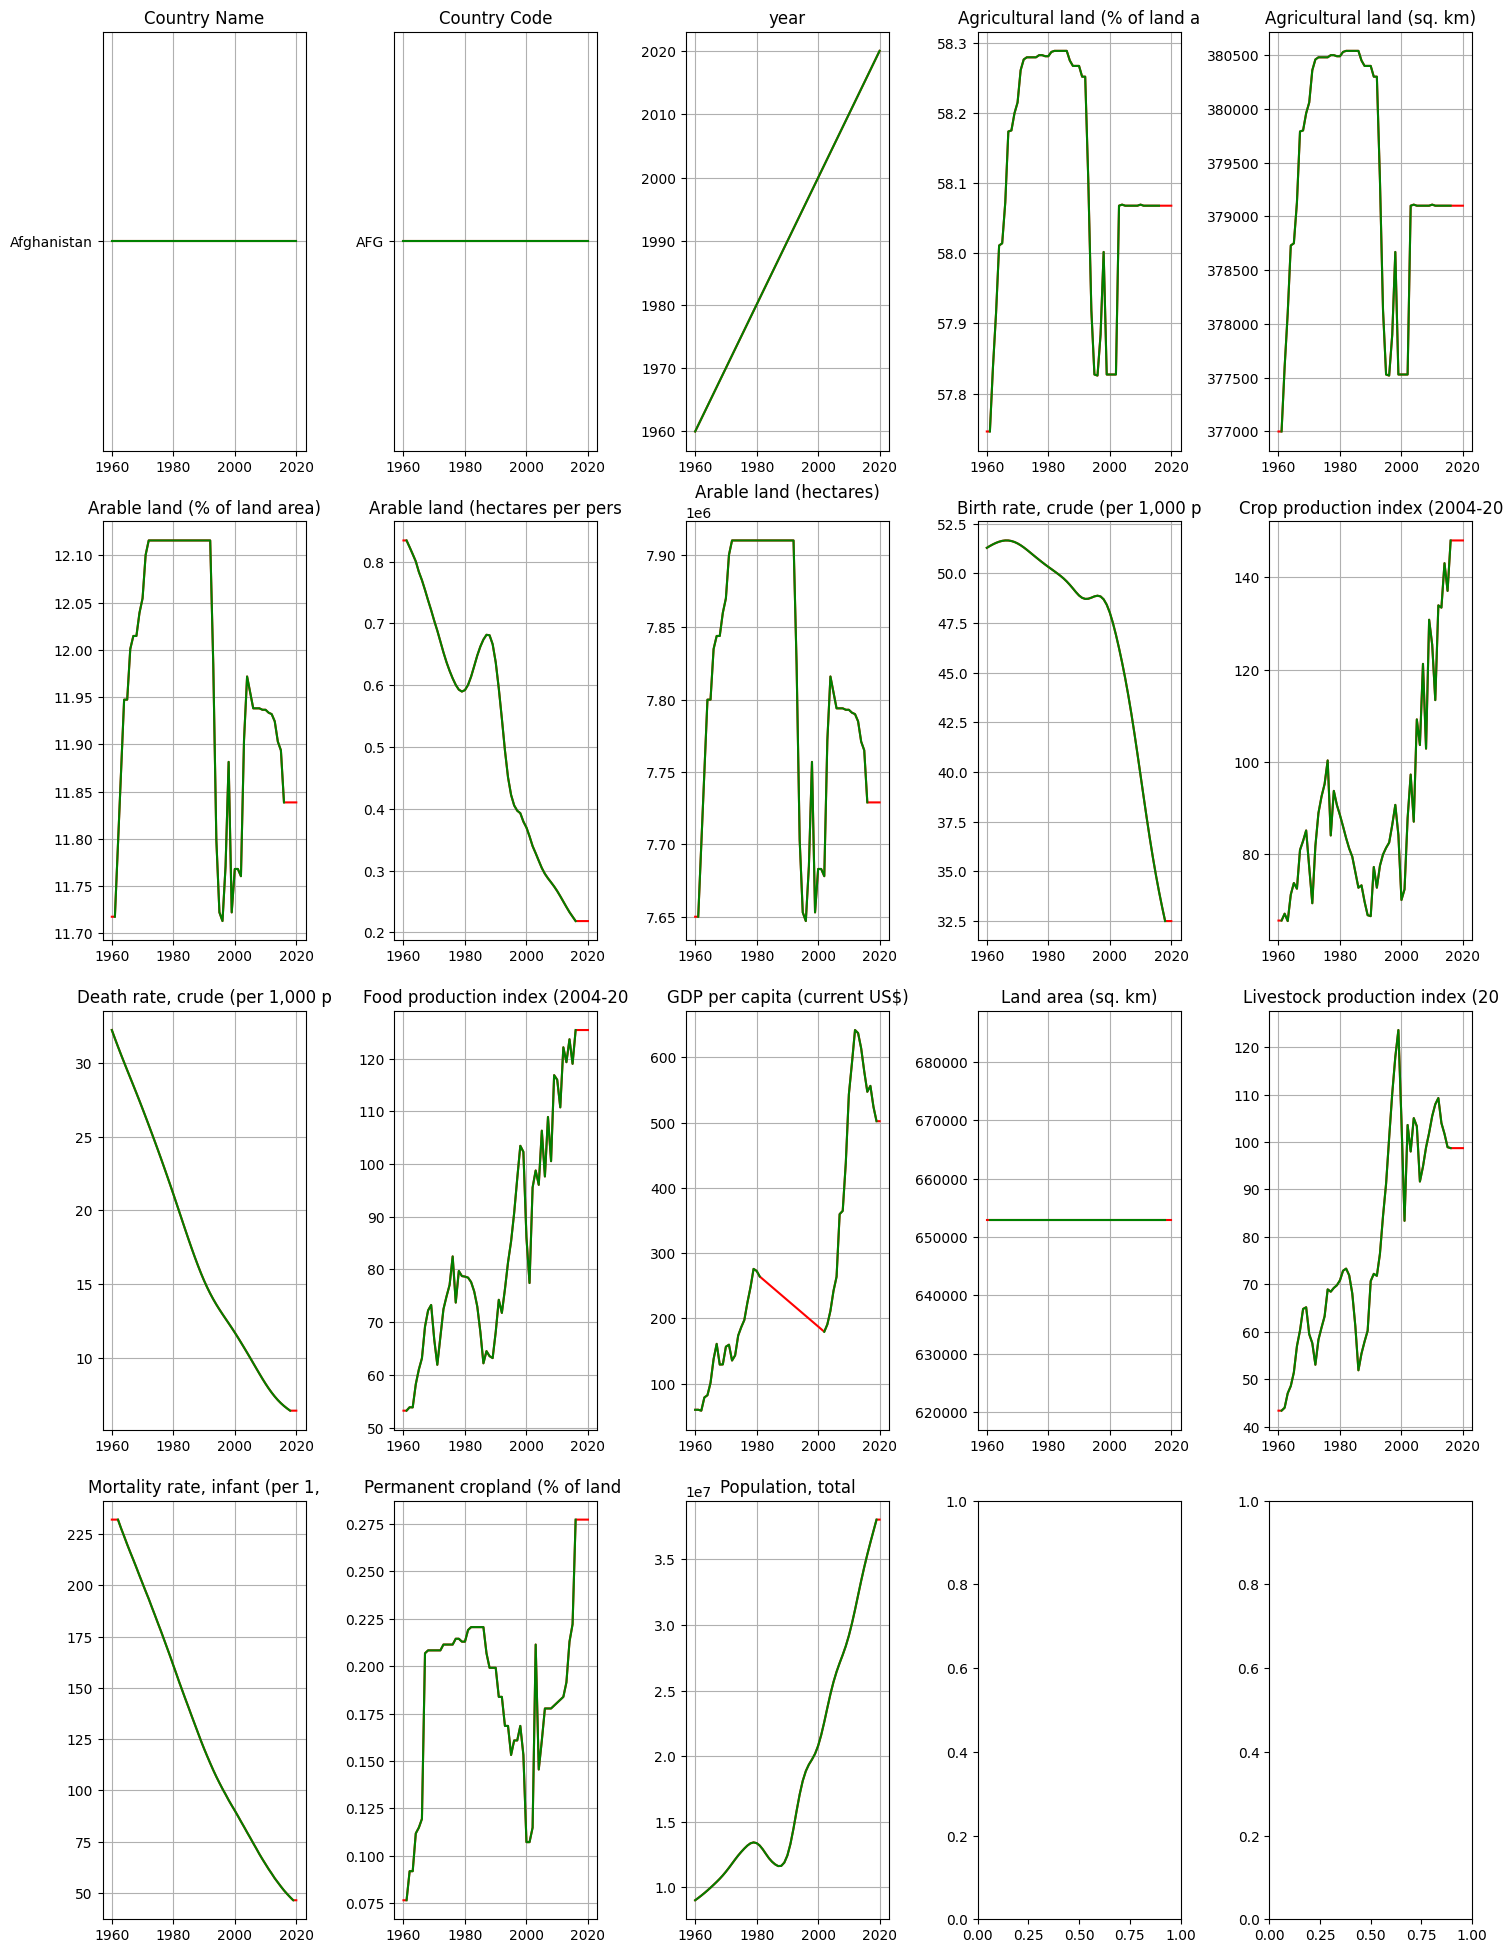

In [135]:
country = country_names[0]
df_country_oig = df_selected.loc[df_selected["Country Name"] == country,:]
df_country_imputed = df_imputed.loc[df_imputed["Country Name"] == country,:]

time = df_country_imputed.iloc[:,2]
names = df_country_imputed.columns.values

fig, axs = plt.subplots(4,5, figsize=(15,20))
fig.tight_layout(pad=3.0)
for i, nam in enumerate(names[3:-1]):
    ax = axs[i//5, i%5]
    ax.set_title(names[i][0:30])
    ax.plot(time, df_country_imputed.iloc[:,i], color='red')
    ax.plot(time, df_country_oig.iloc[:,i], color='green')
    ax.set_axisbelow(True)
    ax.grid()


# Data Distribution Visualisation

In [136]:
df_oig.shape

(13908, 55)

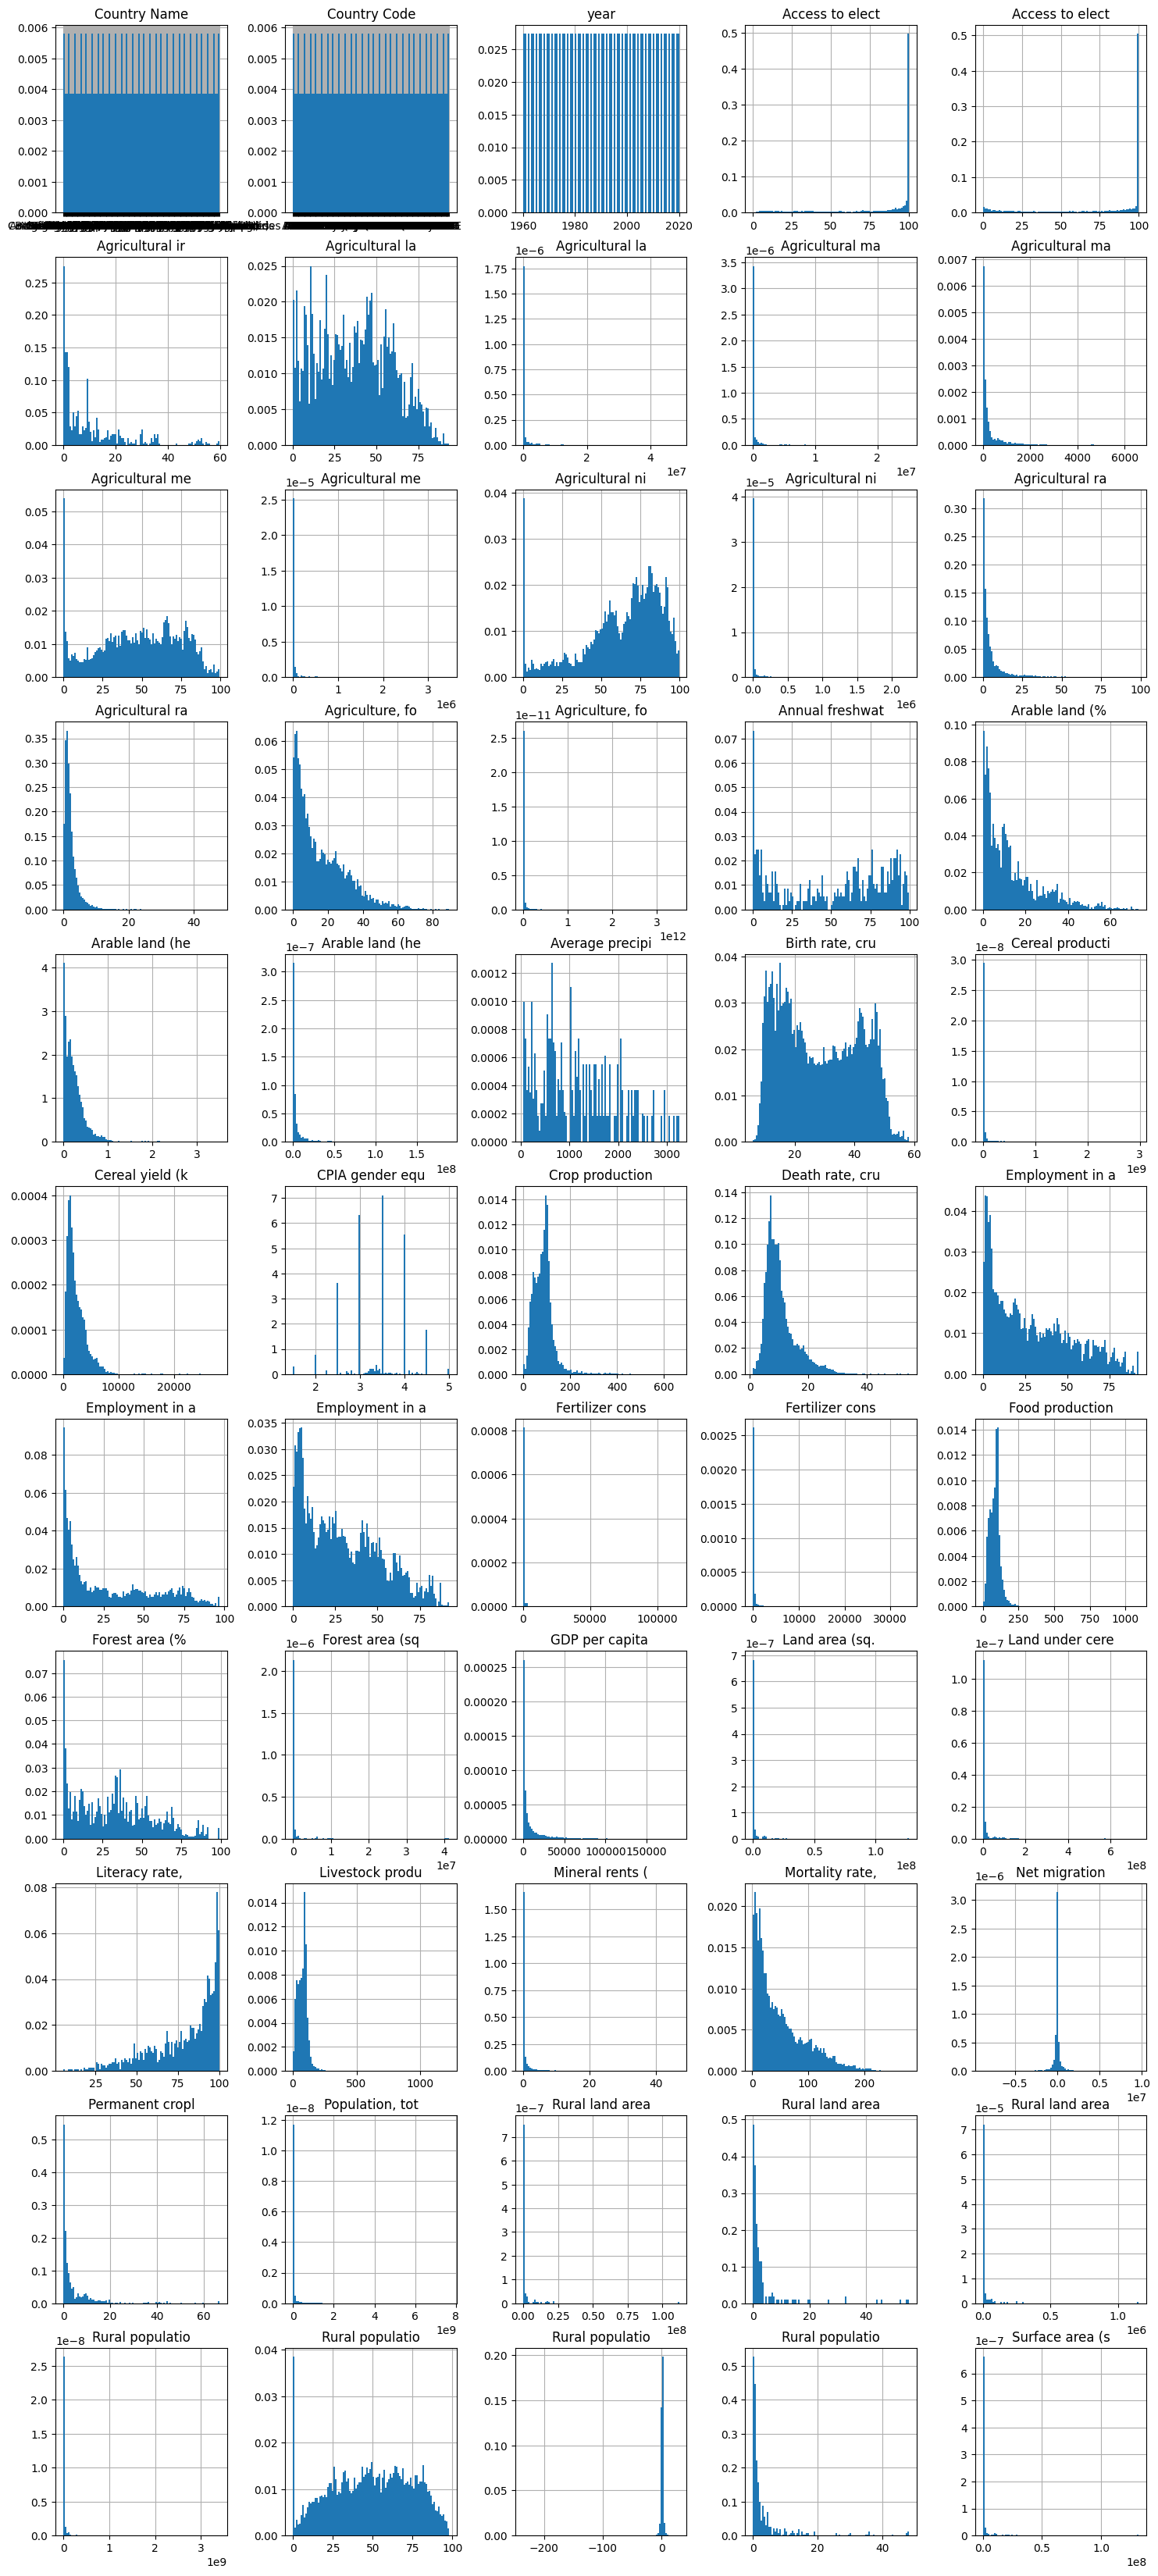

In [137]:
# varable distribution overview
alpha = 0.025

all_attributes_names = df_oig.columns.values

fig, axs = plt.subplots(11,5, figsize=(15,33))
fig.tight_layout(pad=2.0)
# fig.suptitle("distribution overview per feature")
for i, nam in enumerate(df_oig.columns.values):
    ax = axs[i//5, i%5]
    ax.set_title(all_attributes_names[i][0:15])
    ax.hist(df_oig[nam], bins=100, density=True)
    ax.set_axisbelow(True)
    ax.grid()


# Data Correlation Visualisation

/var/folders/3c/t08nl7456zl9jcq07p2xt7x80000gn/T/ipykernel_88812/3724694586.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: title={'center': 'Correlation plot'}>

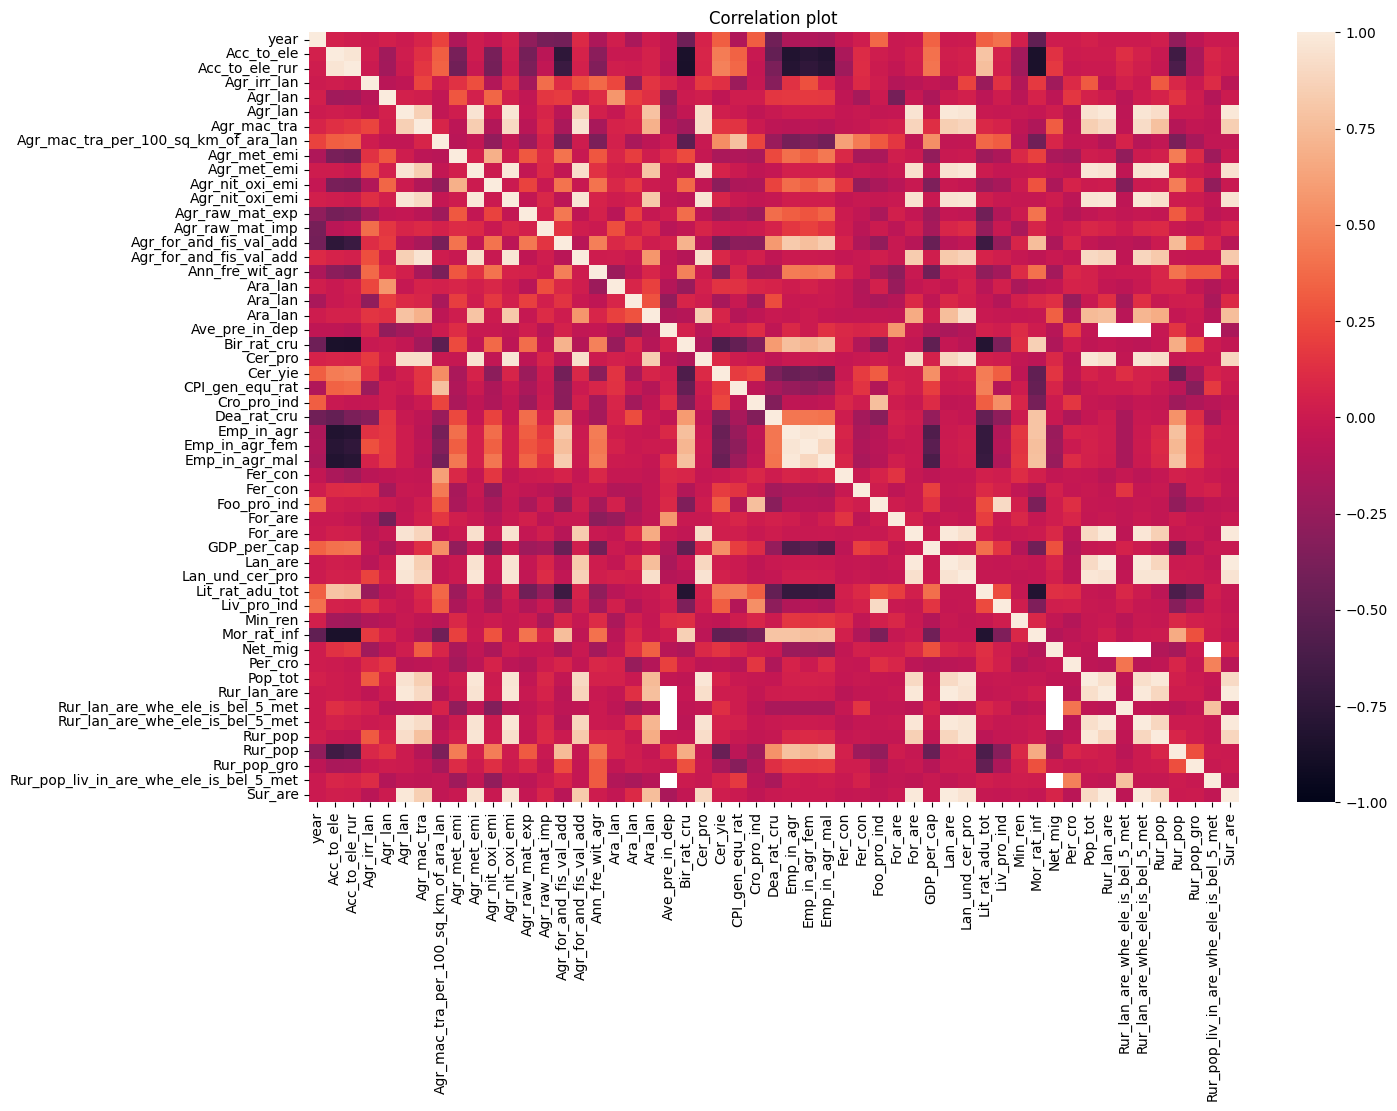

In [138]:
def process_name(name):
    name = name.split(' (')[0]\
        .replace(" ", "_")\
        .replace(',','')\
        .replace('.','')
    names = name.split('_')
    if len(names) < 2: return name[:6]
    names = [nam[:3] for nam in names]
    name = '_'.join(names)
    # print(name)
    return name

short_names = list(map(process_name, df_oig.columns.values))
df_short = df_oig.copy()
df_short.columns = short_names


# heatmap - correlation visualisation
plt.figure(figsize=(15,10))
plt.title("Correlation plot")
sns.heatmap(data=df_short.corr(), annot=False, vmax=1, vmin=-1)

/var/folders/3c/t08nl7456zl9jcq07p2xt7x80000gn/T/ipykernel_88812/2176888686.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: title={'center': 'Correlation plot'}>

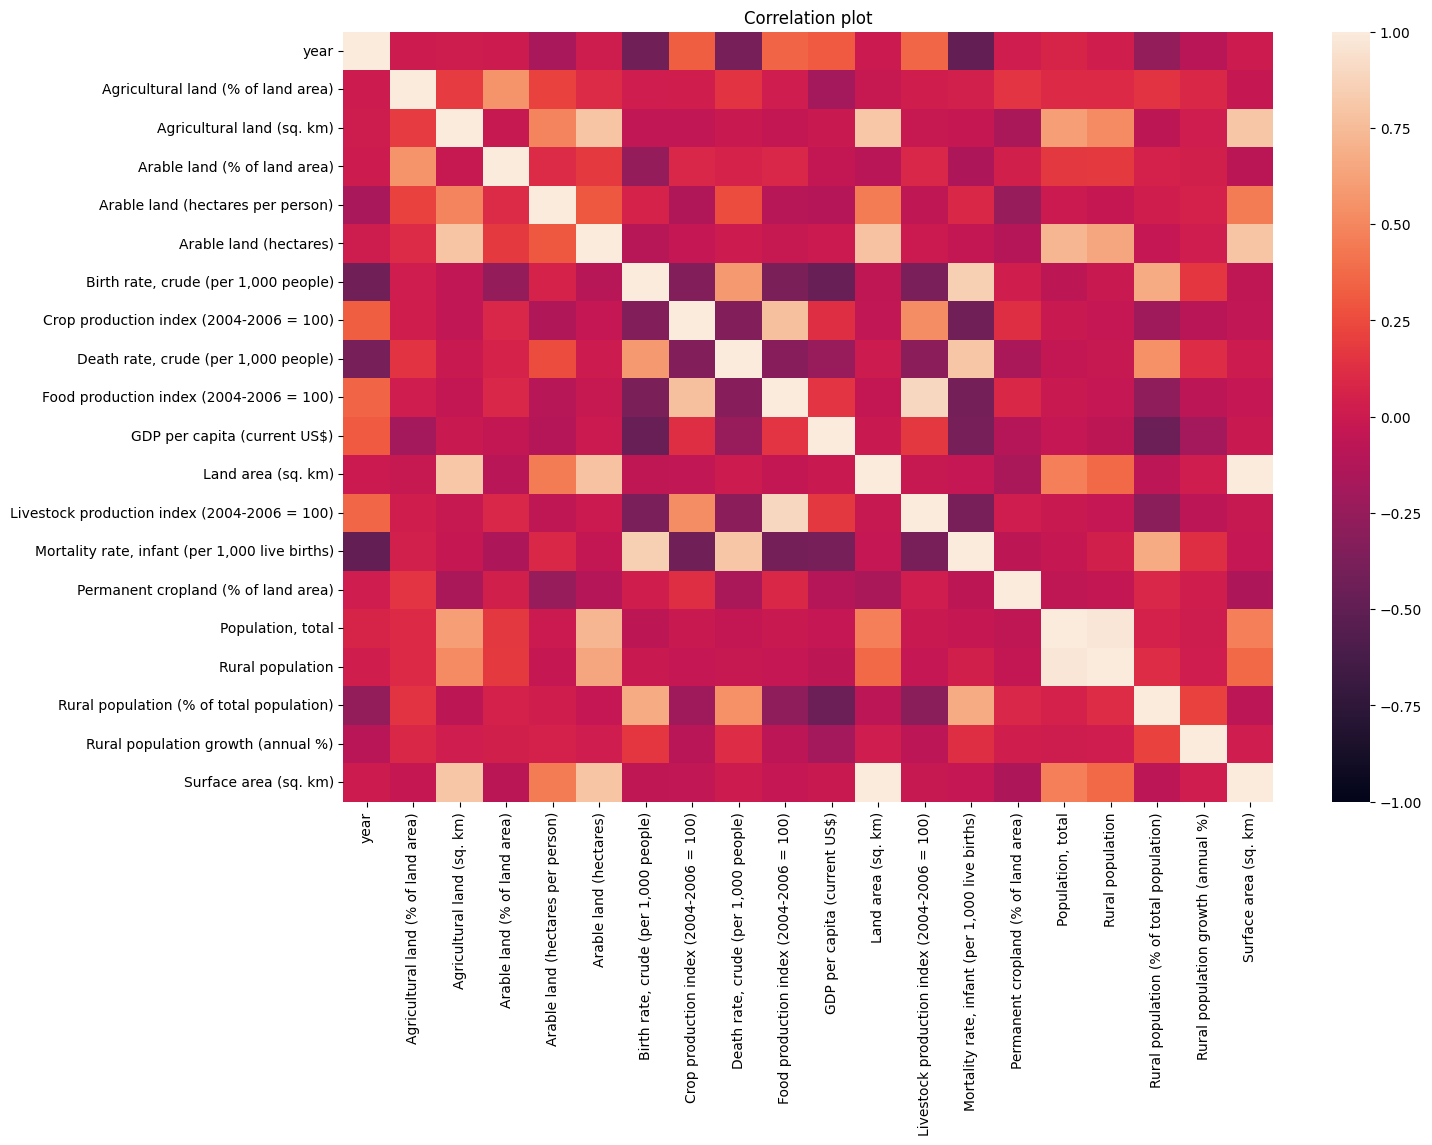

In [139]:
# heatmap - correlation visualisation
plt.figure(figsize=(15,10))
plt.title("Correlation plot")
sns.heatmap(data=df_imputed.corr(), annot=False, vmax=1, vmin=-1)

# Data Semantics Visualisation

In [140]:
# !pip install plotly

In [244]:
df_geo_vis = df_imputed.loc[df_imputed['year'] == 2000, ['Country Name', 'Population, total']]


In [235]:
for name in df_geo_vis['Country Name']:
    print(name)

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong SAR, China
Hungary
Iceland
India
Indonesia
Iran, Islamic Rep.
Iraq
Ireland
Isle of Man
Italy
Jamaica
Japan
Jordan
K

In [245]:
# name mapping
new_names_map = {}
new_names_map['North Macedonia'] = 'North Macedonia'
new_names_map['Bosnia and Herzegovina'] = 'Bosnia and Herzegovina'
new_names_map['Slovak Republic'] = 'Slovakia'
new_names_map['Czech Republic'] = 'Czech Republic'
new_names_map['United Kingdom'] = 'United Kingdom'
new_names_map['Russian Federation'] = 'Russia'
def map_a_name(name):
    if name in new_names_map.keys():
        return new_names_map[name]
    return name

df_geo_vis['Country Name'] = df_geo_vis['Country Name'].apply(lambda x: map_a_name(x))
for nam in df_geo_vis['Country Name']:
    print(nam)


Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong SAR, China
Hungary
Iceland
India
Indonesia
Iran, Islamic Rep.
Iraq
Ireland
Isle of Man
Italy
Jamaica
Japan
Jordan
K

In [246]:
# Filtering
# print(json.dumps(geo_europe['features'][0]['properties']["name_en"], indent=2))

country_names_filter = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 
    'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'FaroeIslands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Hungary', 
    'Iceland', 'Ireland', 'IsleofMan', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Moldova', 'Monaco', 
    'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'SanMarino', 
    'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'
]

df_geo_vis = df_geo_vis.loc[df_geo_vis['Country Name'].isin(country_names_filter),]
print(df_geo_vis['Country Name'])


101                     Albania
284                     Andorra
528                     Armenia
711                     Austria
1077                    Belarus
1138                    Belgium
1504     Bosnia and Herzegovina
1809                   Bulgaria
2968                    Croatia
3151                     Cyprus
3212             Czech Republic
3273                    Denmark
3822                    Estonia
4127                    Finland
4188                     France
4493                    Germany
4615                  Gibraltar
4676                     Greece
5347                    Hungary
5408                    Iceland
5713                    Ireland
5835                      Italy
6384                     Kosovo
6628                     Latvia
6933              Liechtenstein
6994                  Lithuania
7055                 Luxembourg
7848                    Moldova
7909                     Monaco
8031                 Montenegro
8458                Netherlands
8824    

Country Name  Population, total
4493         Germany         82211508.0
12057         Turkey         63240194.0
4188          France         60912500.0
5835           Italy         56942108.0
12362        Ukraine         49176500.0
10898          Spain         40567864.0
9495          Poland         38258629.0
9739         Romania         22442971.0
8458     Netherlands         15925513.0
4676          Greece         10805808.0
9556        Portugal         10289898.0
1138         Belgium         10251250.0
5347         Hungary         10210971.0
1077         Belarus          9979610.0
11386         Sweden          8872109.0
1809        Bulgaria          8170172.0
711          Austria          8011566.0
10227         Serbia          7516346.0
11447    Switzerland          7184250.0
3273         Denmark          5339616.0
4127         Finland          5176209.0
8946          Norway          4490967.0
2968         Croatia          4468302.0
5713         Ireland          3805174.0
6994       Lithuania          3499536.0
101          Albania          3089027.0
528          Armenia          3069591.0
7848         Moldova          2923783.0
6628          Latvia          2367550.0
10593       Slovenia          1988925.0
6384          Kosovo          1700000.0
3822         Estonia          1396985.0
3151          Cyprus           943290.0
8031      Montenegro           604950.0
7055      Luxembourg           436300.0
5408         Iceland           281205.0
284          Andorra            65390.0
6933   Liechtenstein            33184.0
7909          Monaco            32147.0
4615       Gibraltar            31077.0

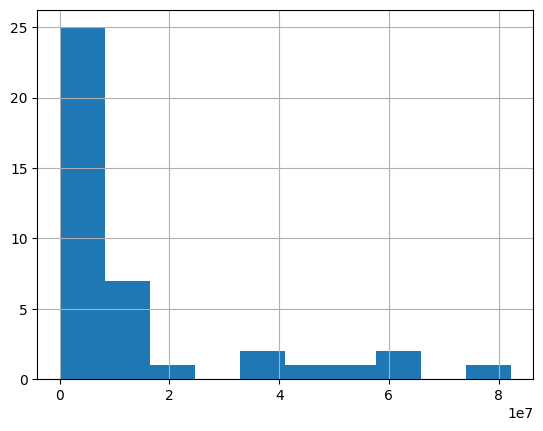

In [178]:
df_geo_vis['Population, total'].hist()
df_geo_vis.sort_values('Population, total', ascending=False)

In [231]:
df_geo_vis['Country Name']

101                     Albania
284                     Andorra
528                     Armenia
711                     Austria
1077                    Belarus
1138                    Belgium
1504     Bosnia and Herzegovina
1809                   Bulgaria
2968                    Croatia
3151                     Cyprus
3273                    Denmark
3822                    Estonia
4127                    Finland
4188                     France
4493                    Germany
4615                  Gibraltar
4676                     Greece
5347                    Hungary
5408                    Iceland
5713                    Ireland
5835                      Italy
6384                     Kosovo
6628                     Latvia
6933              Liechtenstein
6994                  Lithuania
7055                 Luxembourg
7848                    Moldova
7909                     Monaco
8031                 Montenegro
8458                Netherlands
8946                     Norway
9495    

In [247]:
import json
import plotly.express as px

geo_europe = json.load(open("./data/custom.geo.json", 'r'))

g_list = geo_europe['features']
print(json.dumps(geo_europe, indent=2))

fig = px.choropleth(
    df_geo_vis, 
    geojson=geo_europe, 
    locations='Country Name', color='Population, total',
    featureidkey="properties.name_en",
    color_continuous_scale="Viridis",
    range_color=(0, df_geo_vis['Population, total'].max()),
    scope="europe",
    labels={'unemp':'unemployment rate'}
    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "featurecla": "Admin-0 country",
        "scalerank": 1,
        "labelrank": 2,
        "sovereignt": "France",
        "sov_a3": "FR1",
        "adm0_dif": 1,
        "level": 2,
        "type": "Country",
        "tlc": "1",
        "admin": "France",
        "adm0_a3": "FRA",
        "geou_dif": 0,
        "geounit": "France",
        "gu_a3": "FRA",
        "su_dif": 0,
        "subunit": "France",
        "su_a3": "FRA",
        "brk_diff": 0,
        "name": "France",
        "name_long": "France",
        "brk_a3": "FRA",
        "brk_name": "France",
        "brk_group": null,
        "abbrev": "Fr.",
        "postal": "F",
        "formal_en": "French Republic",
        "formal_fr": null,
        "name_ciawf": "France",
        "note_adm0": null,
        "note_brk": null,
        "name_sort": "France",
        "name_alt": null,
        "mapcolor7": 7,
        "mapcolo

# ====================

In [144]:
import geopandas as gpd
df = px.data.election()
geo_df = gpd.GeoDataFrame.from_features(
    px.data.election_geojson()["features"]
).merge(df, on="district").set_index("district")


ModuleNotFoundError: No module named 'geopandas'

In [ ]:
df.head()

fips  unemp
0  01001    5.3
1  01003    5.4
2  01005    8.6
3  01007    6.6
4  01009    5.5

<AxesSubplot: >

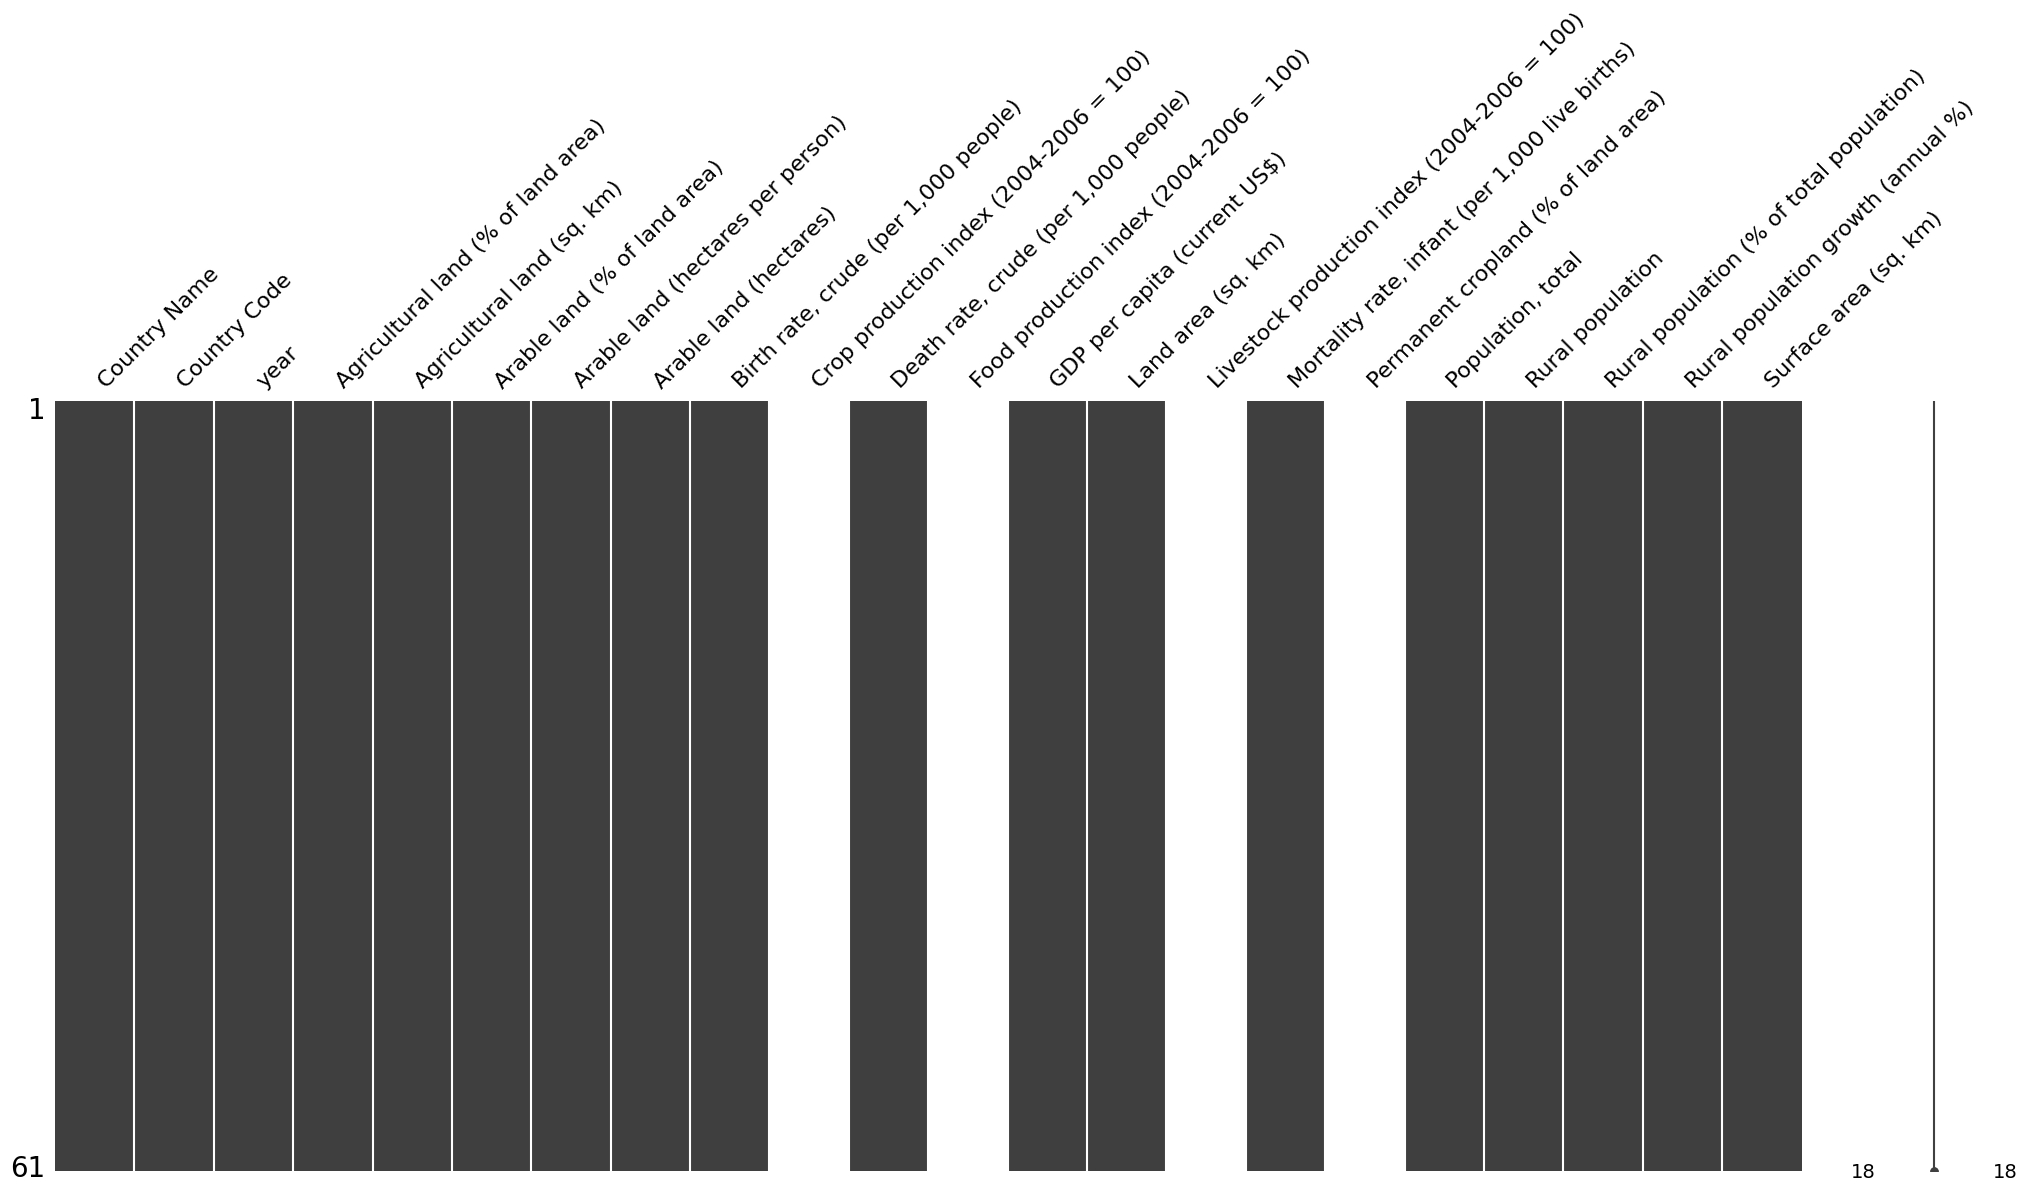

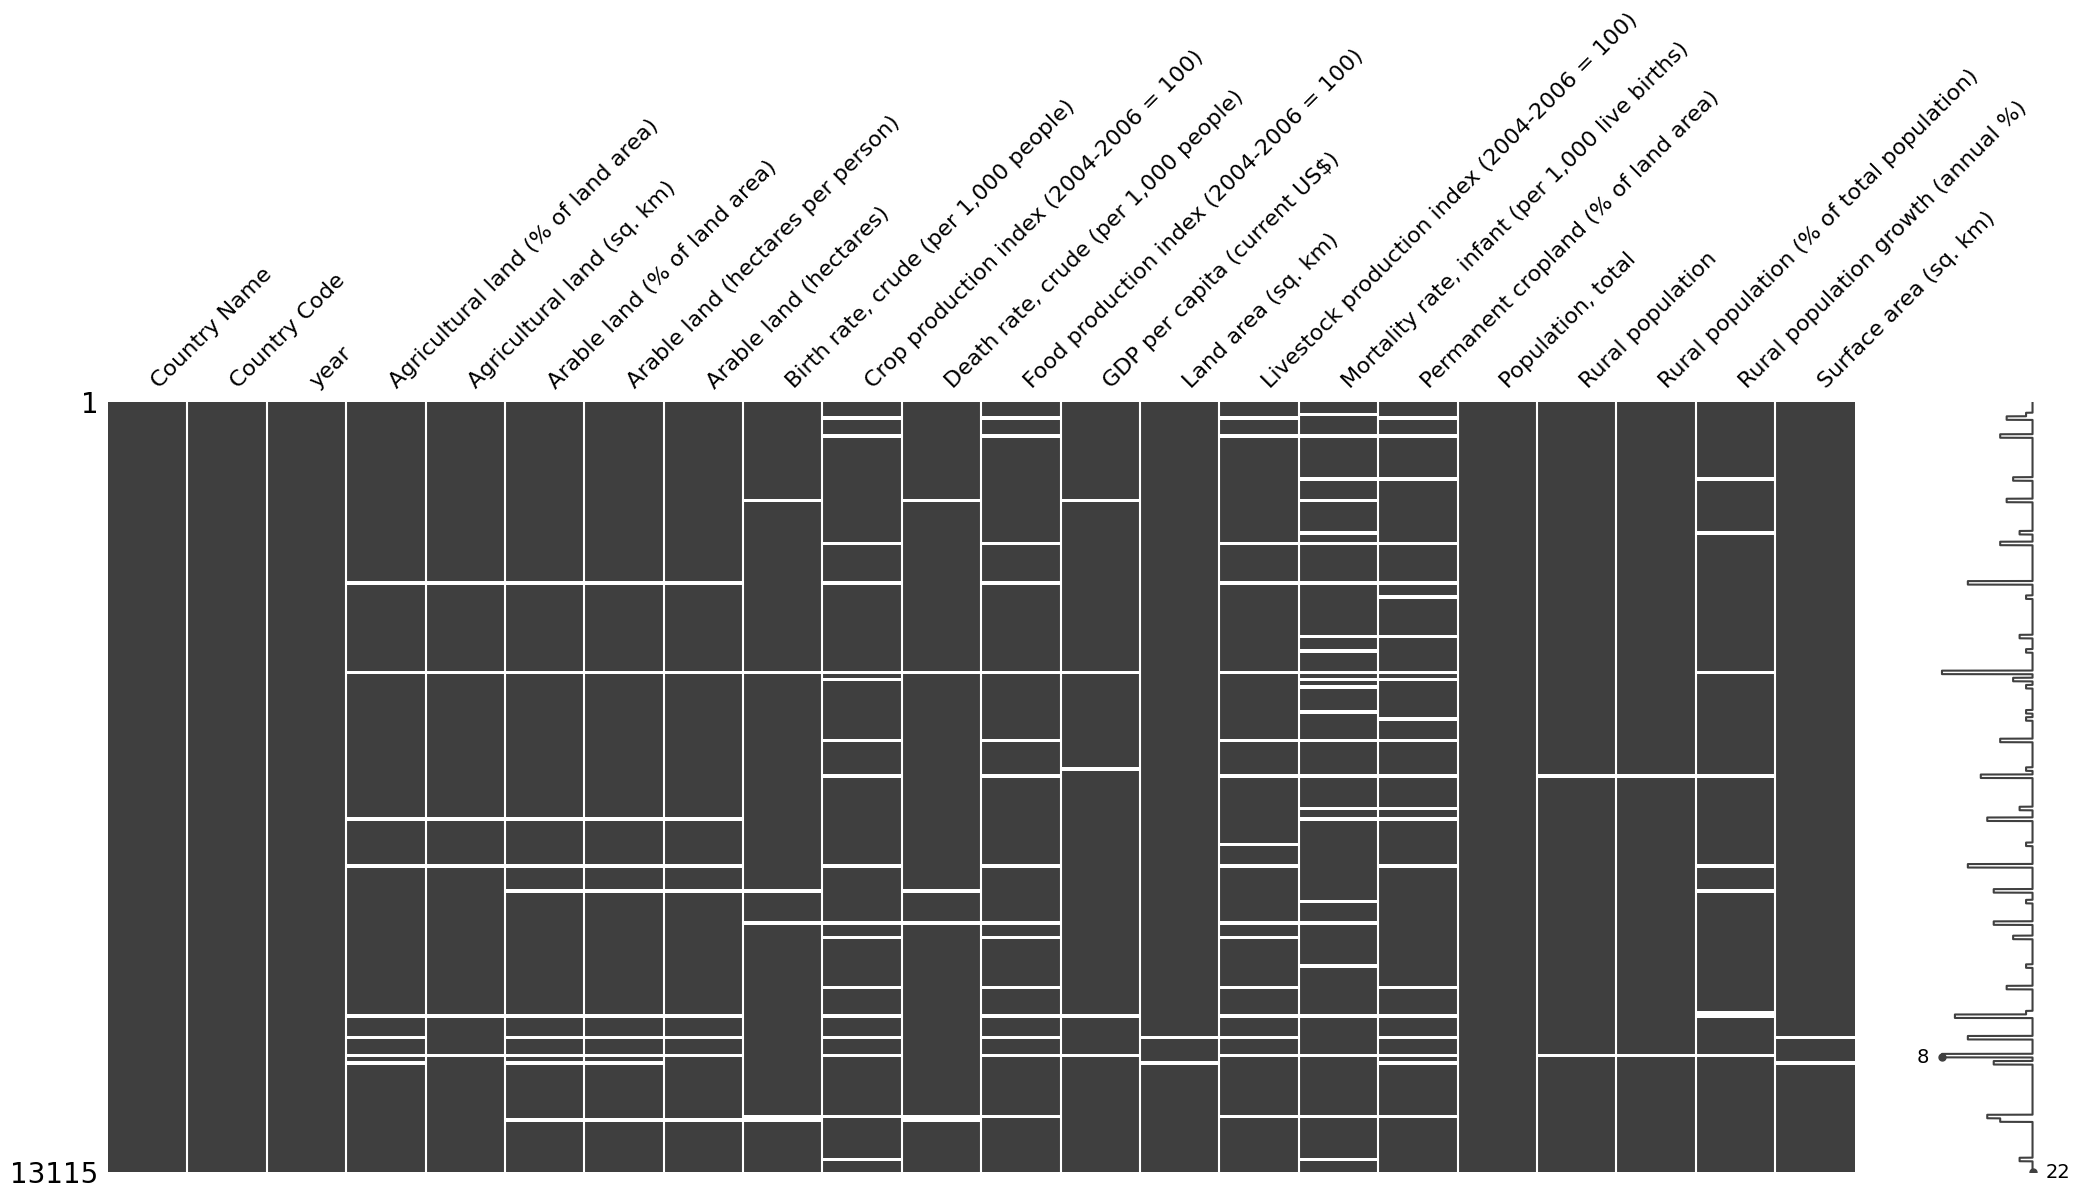

In [ ]:
# df_grouped = df_selected.groupby("Country Name", group_keys=True)


country_names = sorted(list(set(df_selected["Country Name"])))
for cn in country_names:
    selected = df_selected.loc[df_selected["Country Name"] == cn,:]
    # print(selected.shape, selected['Country Name'].iloc[0])
    solution = df_selected.loc[df_selected["Country Name"] == cn,:].apply(lambda x: myImputation(x), axis=0)
    df_selected.loc[df_selected["Country Name"] == cn,:] = solution
msno.matrix(df_selected.loc[df_selected["Country Name"] == country_names[4],:])
msno.matrix(df_selected)


In [ ]:
biggest_countries = cleaned.sort_values(by=f"Agricultural land (% of land area)", axis=0, ascending=False).loc[data["year"]==2000]
biggest_countries = biggest_countries[:10]
fig = plt.figure()

plt.bar(biggest_countries["Country Name"],
       biggest_countries[f"Agricultural land (% of land area)"])
#plt.show()

NameError: name 'cleaned' is not defined

In [ ]:
# shorten column names
names = df.columns.values

def process_name(name):
    name = name.split(' (')[0]\
        .replace(" ", "_")\
        .replace(',','')\
        .replace('.','')
    names = name.split('_')
    if len(names) < 2: return name[:6]
    names = [nam[:3] for nam in names]
    name = '_'.join(names)
    # print(name)
    return name

short_names = list(map(process_name, names))

# df.columns = short_names

In [ ]:
print(len(string))
string = """
______ _ , - - . _ . - ,
______/ \ _ r - , \ _  )
. - . )   _ ; = ' _ /   ( . ;
____\   \\ '---------\ / S  )
_____L . ' - .   _ . ' | - '
__< _ ` - ' \\ ' _ . ' /
_______` ' - . _ ( \\
_______ _ _ _       \\\ ,             _ _ _
_______\   . ' - .   \\\       . - ' _ .   /
________' . _ '   ' . \\ \ / . - ' _ . '
_____________' - - ` ` \ ( ' - - '
________________________\\\\
_______ 1 / 1 0 0 ______`\\\,
__________________________\|
"""
string = string.replace('  ', 'XX')
print(string)


string_2 = string.split()
print(' '.join(string_2))

431

______ _ , - - . _ . - ,
______/ \ _ r - , \ _XX)
. - . )XX _ ; = ' _ /XX ( . ;
____\XX \ '---------\ / SXX)
_____L . ' - .XX _ . ' | - '
__< _ ` - ' \ ' _ . ' /
_______` ' - . _ ( \
_______ _ _ _XXXXXX \\ ,XXXXXXXXXXXX _ _ _
_______\XX . ' - .XX \\XXXXXX . - ' _ .XX /
________' . _ 'XX ' . \ \ / . - ' _ . '
_____________' - - ` ` \ ( ' - - '
________________________\\
_______ 1 / 1 0 0 ______`\\,
__________________________\|

______ _ , - - . _ . - , ______/ \ _ r - , \ _XX) . - . )XX _ ; = ' _ /XX ( . ; ____\XX \ '---------\ / SXX) _____L . ' - .XX _ . ' | - ' __< _ ` - ' \ ' _ . ' / _______` ' - . _ ( \ _______ _ _ _XXXXXX \\ ,XXXXXXXXXXXX _ _ _ _______\XX . ' - .XX \\XXXXXX . - ' _ .XX / ________' . _ 'XX ' . \ \ / . - ' _ . ' _____________' - - ` ` \ ( ' - - ' ________________________\\ _______ 1 / 1 0 0 ______`\\, __________________________\|
